# Modeling and Forecasting Time Series in Python

Adapted and updated code from [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/). 

This code continues from [Time_Series_Tests_and_Techniques](https://github.com/markwk/time_series_data_analysis_for_health)

## Libraries and Import Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

In [7]:
# import original data
df = pd.read_csv('../data/sample/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.columns = ['value']

# alternative data to try. NOTE: Comment Out: ts_df['Month'] = pd.to_datetime(ts_df['Month'])
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

ts = df['value']

In [8]:
# ts_log
ts_df = pd.read_csv('../data/sample/ts_log.csv', header=None)
ts_df.columns = ['Month', 'Value']
ts_df['Month'] = pd.to_datetime(ts_df['Month'])
ts_df.set_index('Month', inplace=True)
ts_log = ts_df['Value']

# import differing results
ts_df = pd.read_csv('../data/sample/ts_log_diff.csv', header=None)
ts_df.columns = ['Month', 'Value']
ts_df['Month'] = pd.to_datetime(ts_df['Month'])
ts_df.set_index('Month', inplace=True)
ts_log_diff = ts_df['Value']

# ts decomposition
ts_df = pd.read_csv('../data/sample/ts_log_decompose.csv', header=None)
ts_df.columns = ['Month', 'Value']
ts_df['Month'] = pd.to_datetime(ts_df['Month'])
ts_df.set_index('Month', inplace=True)
ts_log_decompose = ts_df['Value']

In [9]:
# ts_df

In [10]:
ts_log_diff.head()
# ts_log_decompose.head()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: Value, dtype: float64

In [11]:
# Create Training and Test

split_num = round(len(ts)*.8)
train = ts_log_diff[:split_num]
test = ts_log_diff[split_num:]

# split_num = round(len(ts_log_diff)*.8)
# train = ts_log_diff[:split_num]
# test = ts_log_diff[split_num:]

forecast_num = len(test)

---

# Modeling

In [12]:
# import ARIMA modeler from Stats Model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from pmdarima.arima.utils import ndiffs

### ADF Checks

In [13]:
def ADF_Test(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [14]:
ADF_Test(ts)

ADF Statistic: 0.815369
p-value: 0.991880


In [15]:
ADF_Test(ts_log_diff)

ADF Statistic: -2.717131
p-value: 0.071121


In [16]:
ADF_Test(ts_log_decompose)

ADF Statistic: -6.332387
p-value: 0.000000


### ACF & PACF Plots

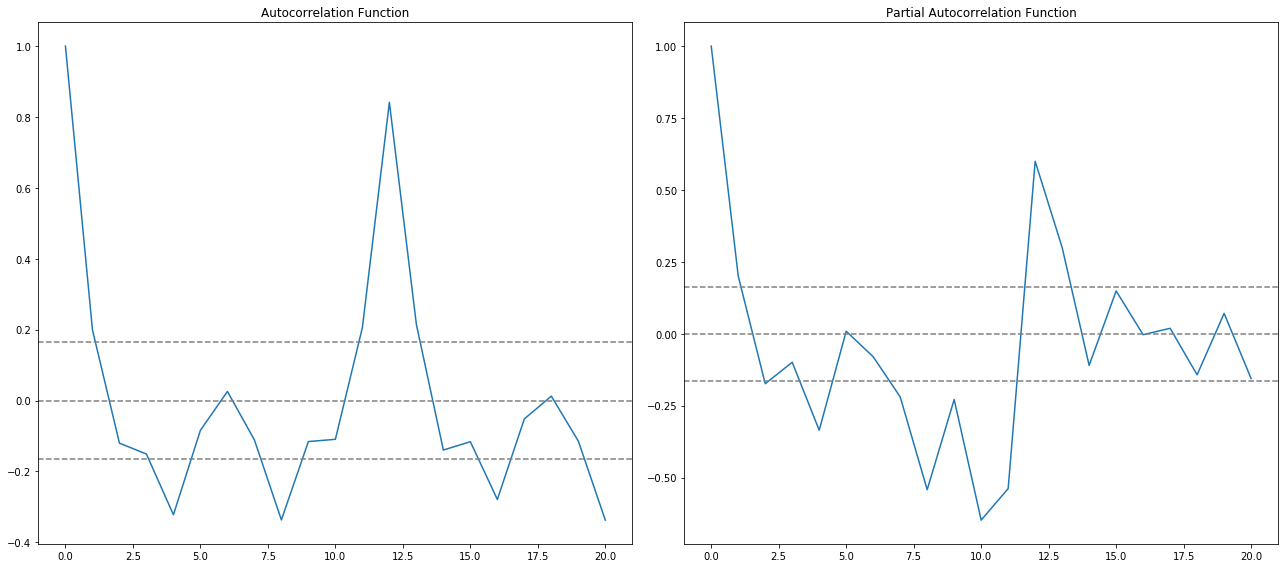

In [17]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

fig = plt.figure(figsize=(18,8))

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  143
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 122.802
Method:                       css-mle   S.D. of innovations              0.102
Date:                Sat, 17 Aug 2019   AIC                           -237.605
Time:                        18:09:41   BIC                           -225.753
Sample:                    02-01-1949   HQIC                          -232.789
                         - 12-01-1960                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0096      0.009      1.048      0.296      -0.008       0.028
ar.L1.D.Value     0.2359      0.083      2.855      0.005       0.074       0.398
ar.L2.D.Value    -0.1725      0.083     

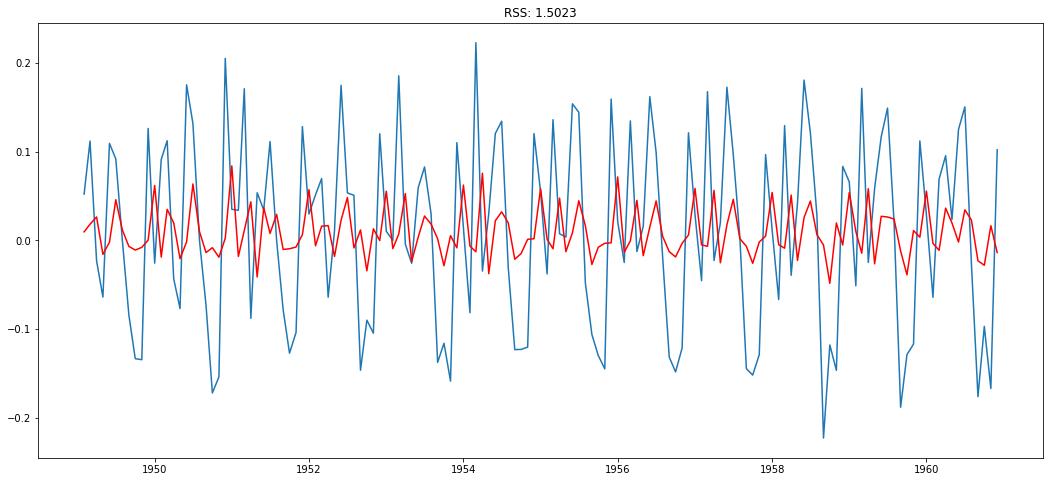

In [18]:
#MA model:
fig = plt.figure(figsize=(18,8))
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

print(results_AR.summary())

### MA Model

In [19]:
# fig = plt.figure(figsize=(18,8))
# model = ARIMA(ts_log, order=(0, 1, 2))  
# results_MA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# print(results_MA.summary())

### ARIMA Model:

(Combined Model of AR and MA)

/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/markkoester/.virtualenvs/base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Sat, 17 Aug 2019   AIC                           -287.281
Time:                        18:09:41   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.D.Value     1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.D.Value    -0.8946      0.039    -

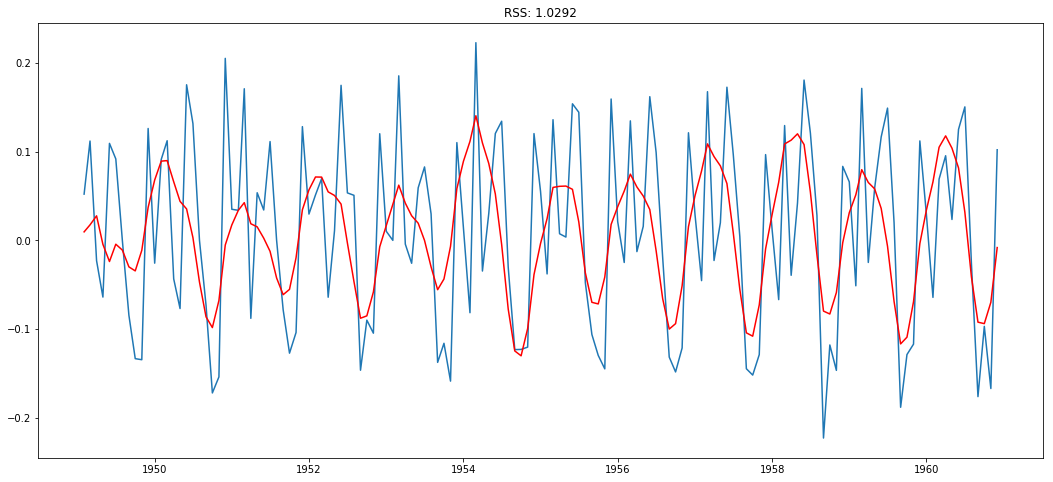

In [20]:
fig = plt.figure(figsize=(18,8))
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

print(results_ARIMA.summary())

### Convert to original scale:

In [21]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [22]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [23]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

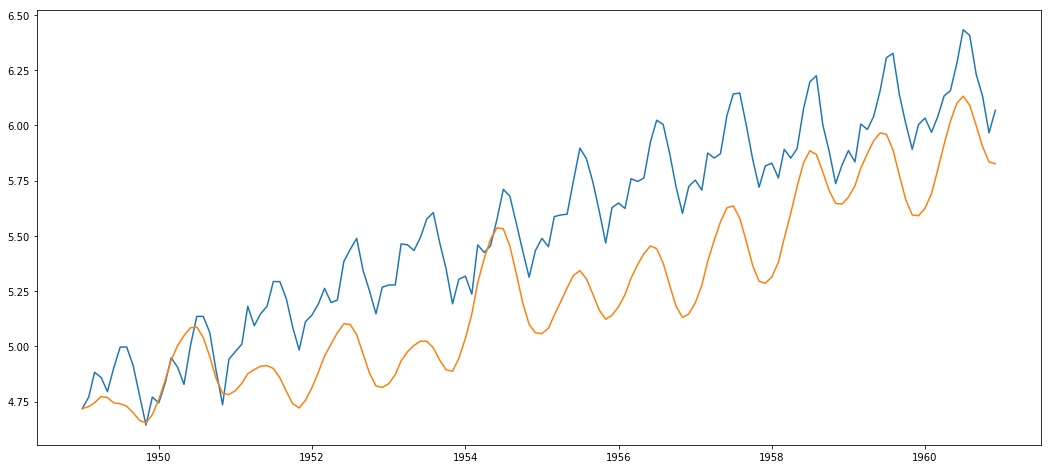

In [24]:
fig = plt.figure(figsize=(18,8))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

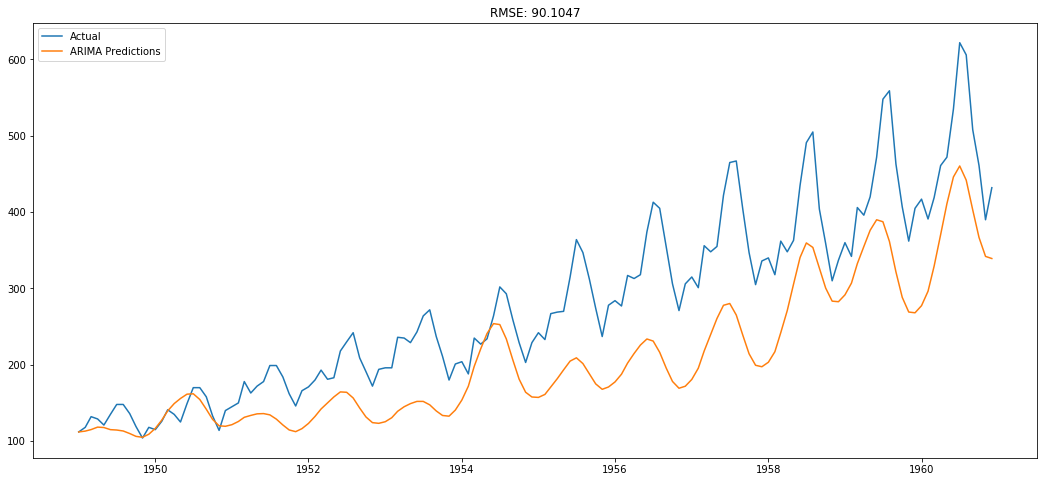

In [25]:
fig = plt.figure(figsize=(18,8))
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts, label='Actual')
plt.plot(predictions_ARIMA, label='ARIMA Predictions')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.legend(loc='best')

## Forecasting (Manual Walkthrough)

### Accuracy metrics

In [26]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

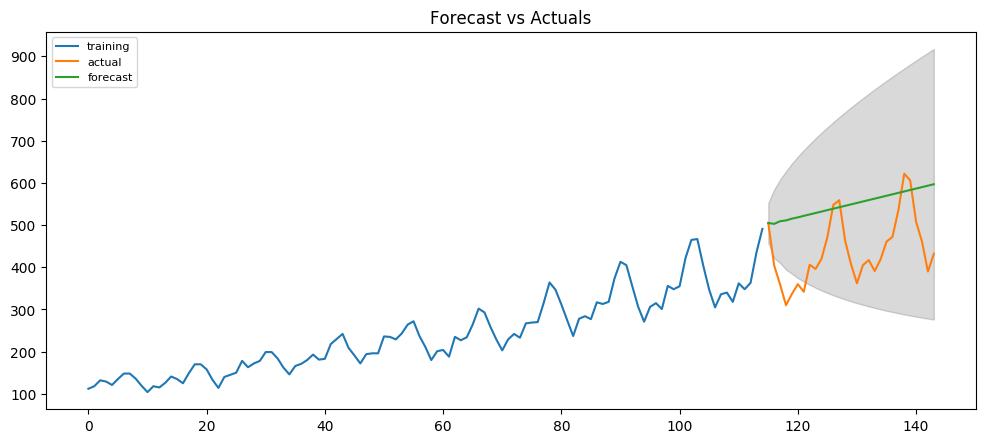

{'mape': 0.2902016889731323,
 'me': 108.95951415016131,
 'mae': 115.20220502362582,
 'mpe': 0.2797554561641934,
 'rmse': 129.47194110294882,
 'acf1': 0.6668109828826083,
 'corr': 0.45524369169609025,
 'minmax': 0.21031119670836185}

In [42]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(forecast_num, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

forecast_accuracy(fc, test.values)

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  114
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -517.597
Method:                       css-mle   S.D. of innovations             22.297
Date:                Sat, 17 Aug 2019   AIC                           1047.193
Time:                        18:15:23   BIC                           1063.610
Sample:                             1   HQIC                          1053.856
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5986      0.225     11.534      0.000       2.157       3.040
ar.L1.D.value     0.3331      0.171      1.945      0.054      -0.003       0.669
ar.L2.D.value     0.1760      0.168     

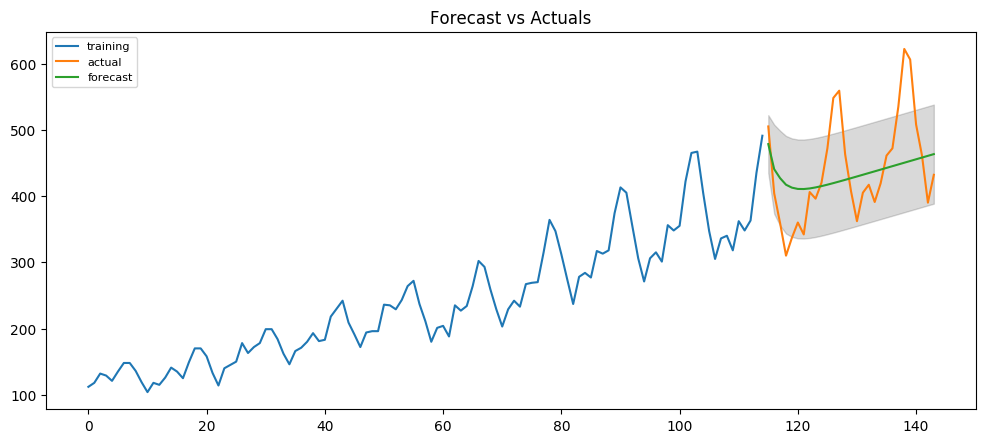

{'mape': 0.12609208615150908,
 'me': -6.00308626224383,
 'mae': 56.34652135077617,
 'mpe': 0.012742681348887364,
 'rmse': 71.97441889574212,
 'acf1': 0.7530129977395127,
 'corr': 0.4534125050469862,
 'minmax': 0.11556854272701067}

In [43]:
# Build Model
model = ARIMA(train, order=(2, 1, 2)) 
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(forecast_num, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

forecast_accuracy(fc, test.values)

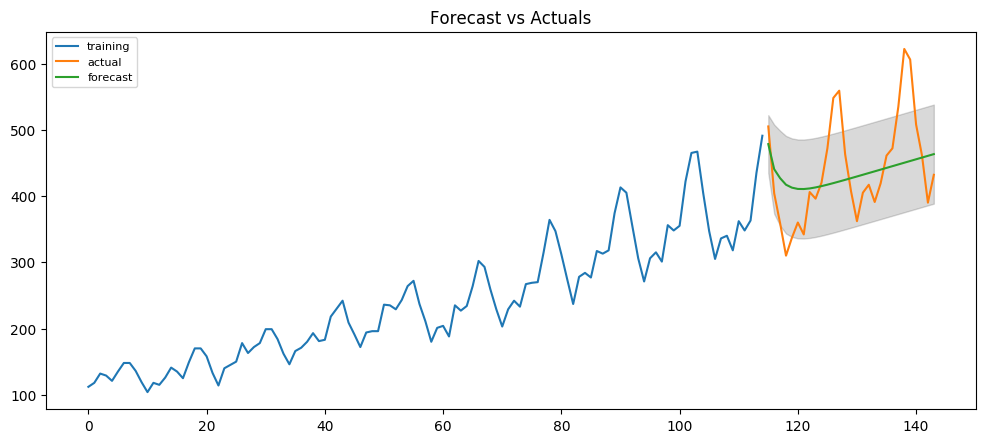

{'mape': 0.12609208615150908,
 'me': -6.00308626224383,
 'mae': 56.34652135077617,
 'mpe': 0.012742681348887364,
 'rmse': 71.97441889574212,
 'acf1': 0.7530129977395127,
 'corr': 0.4534125050469862,
 'minmax': 0.11556854272701067}

In [36]:
# Build Model
model = ARIMA(train, order=(2, 1, 2)) 
fitted = model.fit(disp=-1)  
# print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(forecast_num, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

forecast_accuracy(fc, test.values)

## Auto Arima Model Selection and Forecast

In [30]:
import pmdarima as pm

In [31]:
ts = ts.reset_index(drop=True)
split_num = round(len(ts)*.8)
train = ts[:split_num]
test = ts[split_num:]
forecast_num = len(test)

In [32]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=1078.074, BIC=1089.053, Fit time=0.076 seconds
Fit ARIMA: order=(0, 0, 0); AIC=1367.727, BIC=1373.216, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=1092.214, BIC=1100.449, Fit time=0.043 seconds
Fit ARIMA: order=(0, 0, 1); AIC=1232.916, BIC=1241.151, Fit time=0.036 seconds
Fit ARIMA: order=(2, 0, 1); AIC=1073.718, BIC=1087.443, Fit time=0.116 seconds
Fit ARIMA: order=(2, 0, 0); AIC=1083.134, BIC=1094.113, Fit time=0.062 seconds
Fit ARIMA: order=(2, 0, 2); AIC=1073.767, BIC=1090.237, Fit time=0.196 seconds
Fit ARIMA: order=(3, 0, 2); AIC=1073.975, BIC=1093.190, Fit time=0.330 seconds
Fit ARIMA: order=(3, 0, 1); AIC=1075.102, BIC=1091.571, Fit time=0.796 seconds
Total fit time: 1.665 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  115
Model:                     ARMA(2, 1)   Log Likelihood                -531.859
Method:               

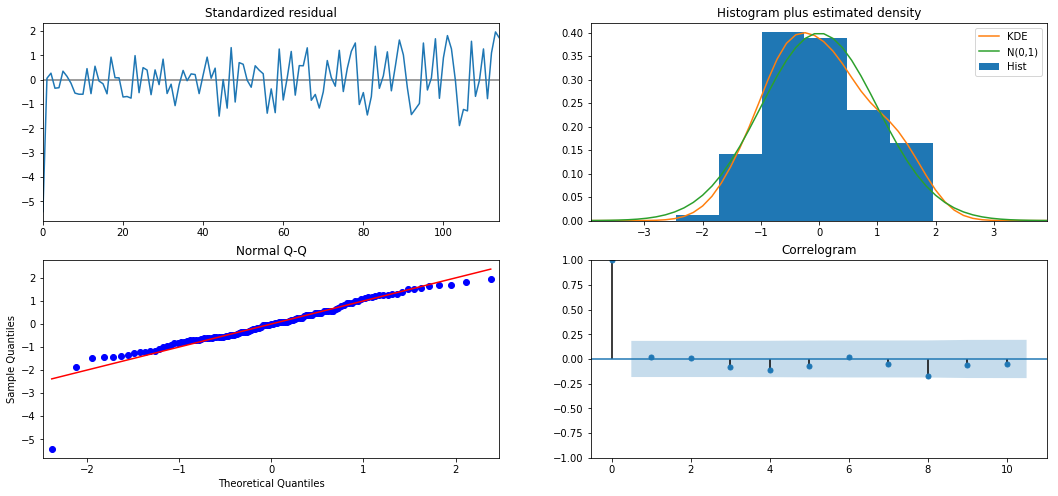

In [33]:
model.plot_diagnostics(figsize=(18,8))
plt.show()

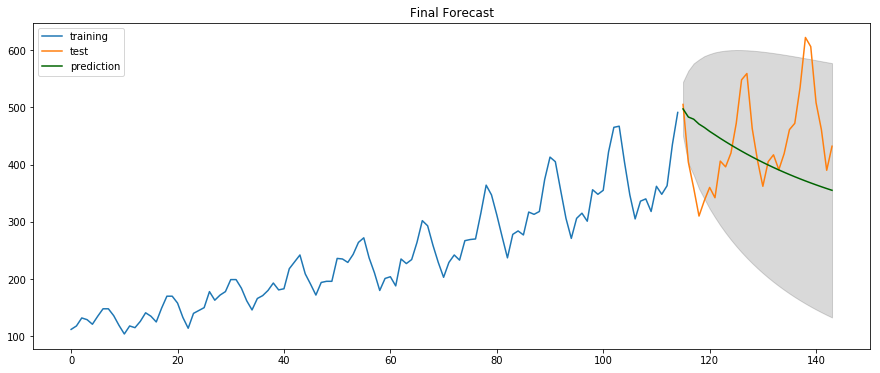

{'mape': 0.18775129403158808,
 'me': -26.31608471319195,
 'mae': 84.01676159589955,
 'mpe': -0.023403850952805203,
 'rmse': 106.48251482315055,
 'acf1': 0.868633630446376,
 'corr': -0.44307183463537636,
 'minmax': 0.16821762207619562}

In [34]:
# Forecast
n_periods = forecast_num
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train, label='training')
plt.plot(test, label='test')
plt.plot(fc_series, color='darkgreen', label='prediction')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='best')

plt.title("Final Forecast")
plt.show()

forecast_accuracy(fc, test.values)